In [1]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
base_path = Path('/content/drive/MyDrive/ml') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

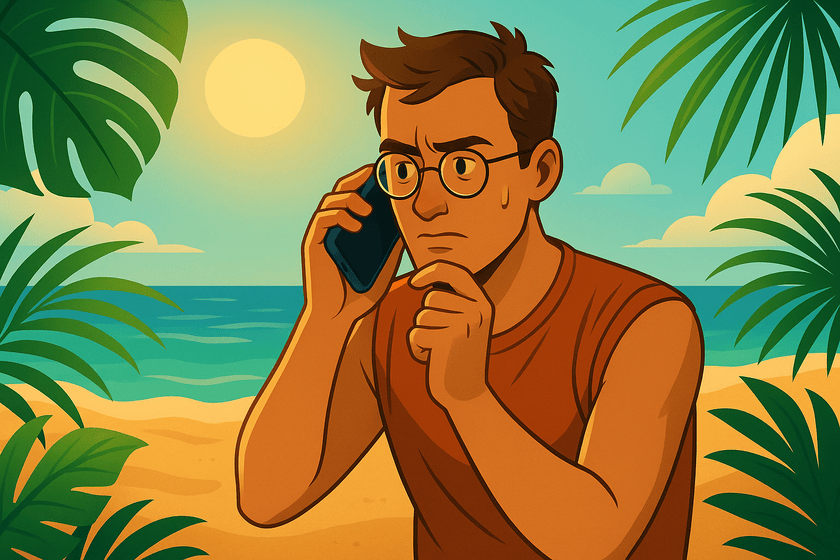

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [241]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

Czy wszystkie kolumny są istotne w kontekście zadania?
W kontekście zadania nie są istotnymi kolumny Name i Ticket.

Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)

In [242]:
titanic_df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,98
Cabin,687


In [243]:
def get_percentage_missing(df, axis):
  """
    Zwraca procent brakujących wartości (NaN) w wierszach lub kolumnach DataFrame.

    df : pandas.DataFrame
        Tabela danych, dla której liczone są braki.

    axis : int
        Oś, względem której obliczane są braki:
        - 0 : procent braków w każdej kolumnie
        - 1 : procent braków w każdym wierszu
  """
  missing_rows = df.isna().sum(axis=axis)
  missing_rows_perc = np.round(missing_rows / df.shape[axis] * 100, 2)
  return missing_rows_perc[missing_rows_perc > 0]

In [244]:
missing_cols_mi = get_percentage_missing(titanic_df, axis=0)
missing_cols_mi

,0
Age,19.87
Fare,11.00
Cabin,77.10
Embarked,0.22


Powyżej widać że występują brak w wartościach Age, Fare, Cabin i Embarked. Dla wypełnenia Embrarked można skorzystać z Najczęstszej wartości(moda) dlatego że brak jest tylko 0.22%. Dla Cabin brak jest duży i dla nich lepiej stworzyć okrzemą sztuczną kategorię Unknown. Dla Age i Fare przed tym jak zacząć uzupełniać jeszcze trzeba sprawdzić czy rozkład jest normalny czy asymetrzyczny.

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
def plot_numeric_histogram(df, column_name):
    """
    Plots a histogram for the specified column in the DataFrame,
    and adds vertical lines for the mean and median.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
    Returns:
        None. Displays the histogram.
    """

    data = df[column_name].dropna()
    mean_val = data.mean()
    median_val = data.median()

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=30, color='steelblue', edgecolor='black')
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

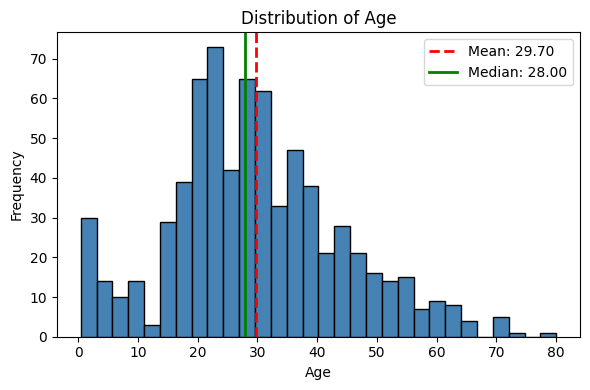

In [247]:
plot_numeric_histogram(titanic_df, 'Age')

Widać że rozkład Age jest asymetrzyczny skośny prawostronnie. Dlatego wypełnienie brakujących wartości będzie wykonano za pomocą mediany i grupowania za płcią i klasem podróży, bo od wieku mogła zależać sytuacja finansowa jak i od płci.

In [248]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df.groupby(['Sex', 'Pclass'])['Age'].transform('median'))

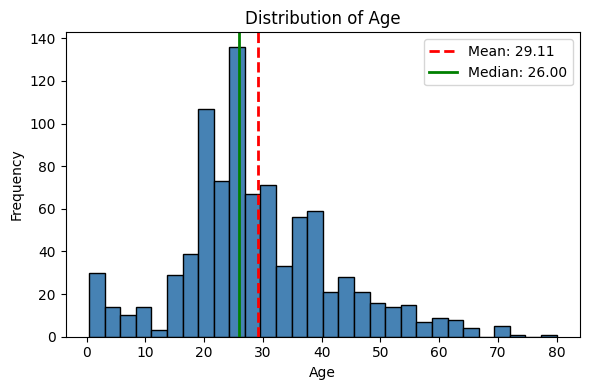

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,98
Cabin,687


In [249]:
plot_numeric_histogram(titanic_df, 'Age')
titanic_df.isnull().sum()

Widać że brakujących wartości w kolumnie Age już nie ma, a rozkład został taki samy.

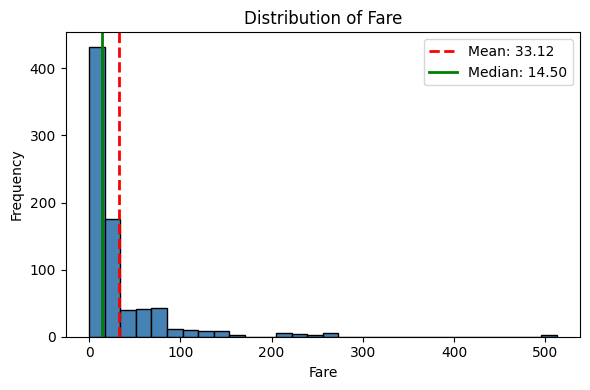

In [250]:
plot_numeric_histogram(titanic_df, 'Fare')

Widać prawostronną asymetrię która jest związana z wielką różnicą w cenie za bilet ludzie z klasu trzeciego i pierwszego. Wypełnić można medianą grupując za klasą pasażerów i portem.

In [251]:
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df.groupby(['Pclass', 'Embarked'])['Fare'].transform('median'))

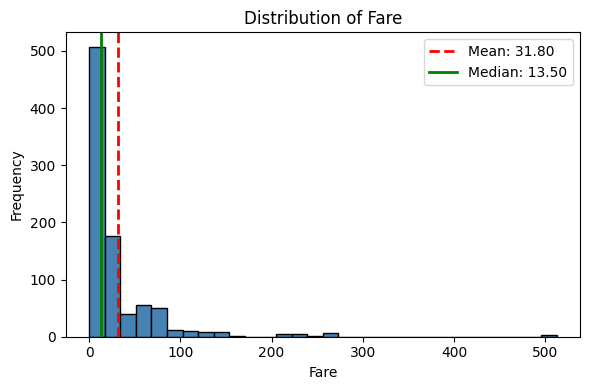

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [252]:
plot_numeric_histogram(titanic_df, 'Fare')
titanic_df.isnull().sum()

Poprzez 77% brakujących wartości dla Cabin wybrano było stworzyć nową grupę Unkown dla pasażerów bez wskazanych kabin. Dla wzbogacenia informacji w zbiorze dodano dwie nowe tabele z informacją dla kabin: Has_Cabin 0/1 dla pasażerów które nie mają wskazanej kabiny i które mają, i Deck dla której było wzięta pierwsza literówka z numeru kabiny, bo dla ludzie z wyższych pokład Tytanicu było więcej szansu się uratować.

In [253]:
titanic_df['Has_Cabin'] = titanic_df['Cabin'].notna().astype(int)
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')
titanic_df['Deck'] = titanic_df['Cabin'].str[0].fillna('Unknown')

Wypełnić Emabrked można za pomocą mody bo 0.22% nie wydaje się jak wielka niedokładność.

In [254]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [255]:
titanic_df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


Wsystkie brakujące wartości zostały dodane i przechodząc do następnęgo pytania Czy typy danych są odpowiednie do znaczenia kolumny?

In [256]:
titanic_df.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


Dedykowaną klasą można podać odpowiednie typy do kolumn

In [257]:
titanic_df = titanic_df.convert_dtypes()
titanic_df.dtypes

,0
Survived,Int64
Pclass,Int64
Name,string[python]
Sex,string[python]
Age,Float64
SibSp,Int64
Parch,Int64
Ticket,string[python]
Fare,Float64
Cabin,string[python]


In [258]:
def plot_categorical_column(df, column_name):
    """
    Plots a bar chart for the specified categorical column.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to plot.
    Returns:
        None. Displays the bar chart.
    """

    # count occurrences of each category
    counts = df[column_name].value_counts()

    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

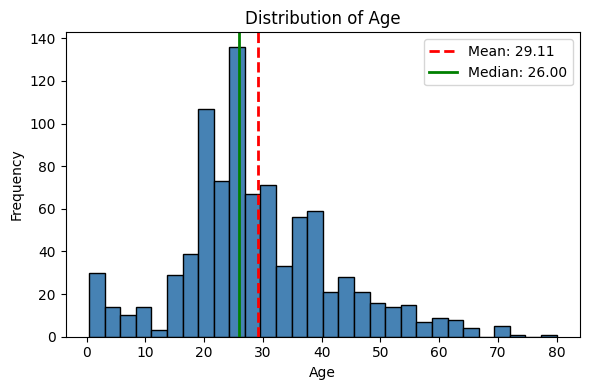

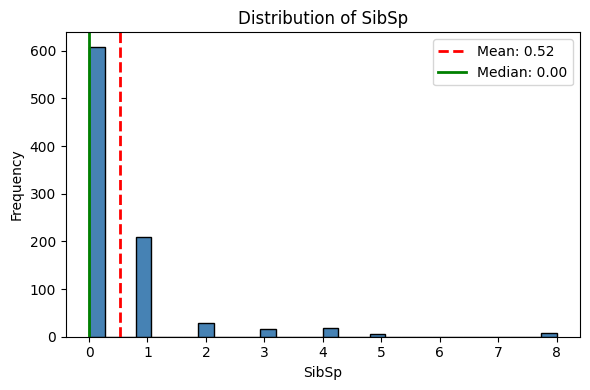

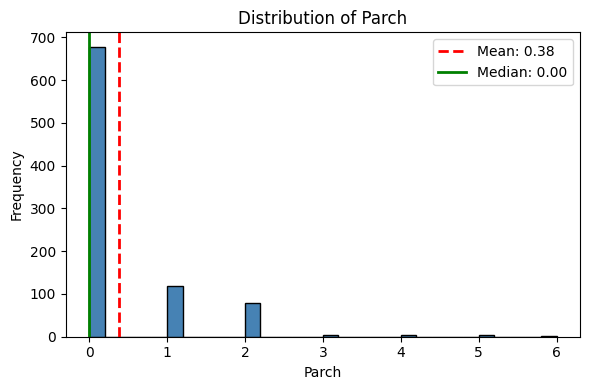

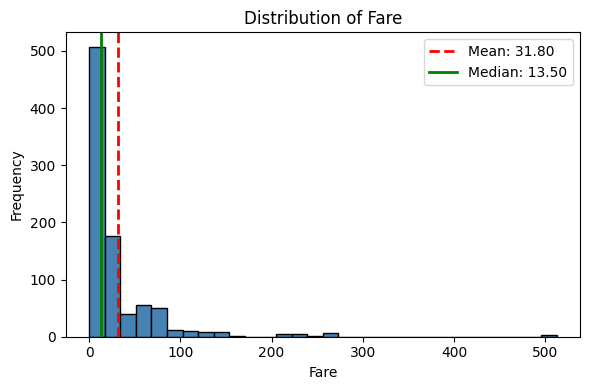

In [259]:
plot_numeric_histogram(titanic_df, 'Age')
plot_numeric_histogram(titanic_df, 'SibSp')
plot_numeric_histogram(titanic_df, 'Parch')
plot_numeric_histogram(titanic_df, 'Fare')

Dystrybucję danych mają rozkłady asymetryczne prawostronnie.

Która zmienna oznacza predykowaną klasę? W tym przypadku zmienną predykowaną jest Survived.

Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych?

In [261]:
titanic_df_backup = titanic_df.copy()

In [265]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [263]:
titanic_df['Deck'] = titanic_df['Deck'].map({
    'A': 8,
    'B': 7,
    'C': 6,
    'D': 5,
    'E': 4,
    'F': 3,
    'G': 2,
    'T': 1,
    'U': 0
})

In [231]:
def plot_correlation_matrix(df):
    """
    Plots a heatmap showing the correlation matrix for numeric columns in the DataFrame.
    Parameters:
        df (pandas.DataFrame): The DataFrame containing numeric data.
    Returns:
        None. Displays the correlation heatmap.
    """
    # compute correlation matrix only for numeric columns
    corr = df.corr(numeric_only=True)

    # fmt=".2f" rounds the number to 0.01
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

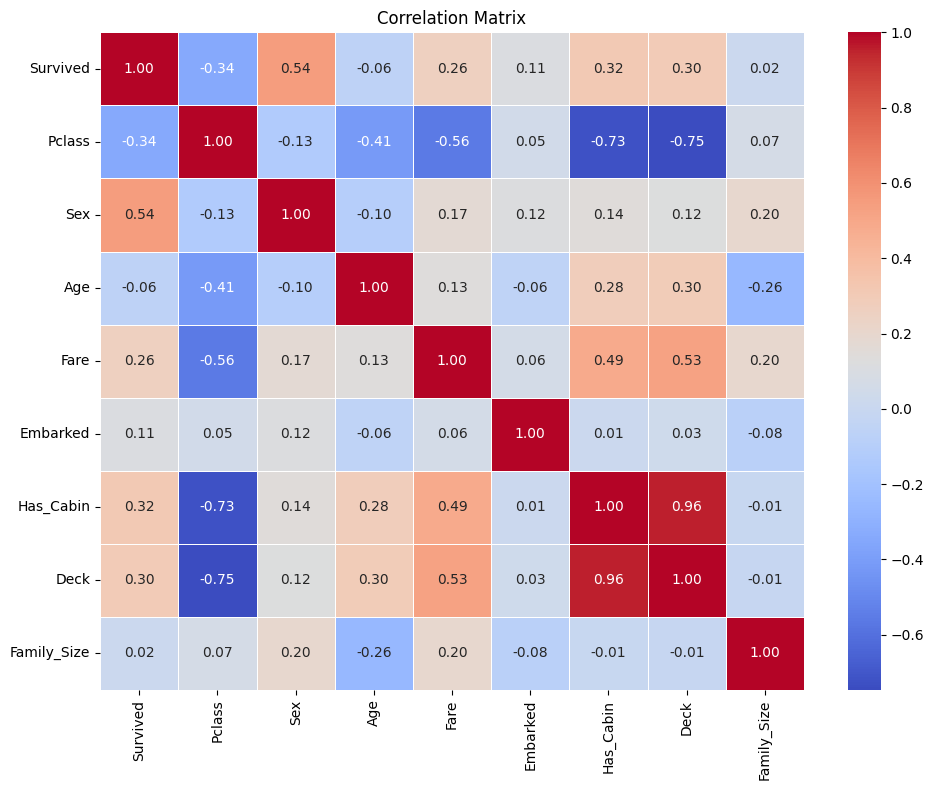

In [270]:
plot_correlation_matrix(titanic_df)

Widać że najwięcej klasa predykowana zależy od płci, dalej od Has_Cabin i Deck. Co dla mnie jest dziwnym to mała zależność klasy predykowanej od Age.Ujemna korelacja w Pclass jest związana z kodowaniem tej kolumny od 1 - nejlepszy do 3 - najgorszy, w tym czasie inne kolumny są kodowane od najmniejszej(najgorsze) do najlepszej(największej). Jeszcze zostały wyrzucone niepotrzebne kolumny Name, Ticket, Cabin, kolumny Sibsp i Parch zostały skombinowane w jednej nowej kolumnie Family_size.

In [268]:
titanic_df = titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [269]:
titanic_df['Family_Size'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df = titanic_df.drop(['SibSp', 'Parch'], axis=1)

Czy końcowe rozkłady zawierają wartości skrajne?

In [303]:
def find_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    print(f"=== {column_name} ===")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)}")

    return outliers

for column in ['Age', 'Fare', 'Family_Size']:
    if column in titanic_df.columns:
        outliers = find_outliers_iqr(titanic_df, column)
        print(f"Outlier values: {outliers[column].tolist()[:10]}") #pokazać pierwsze 10
        print("-" * 40)

=== Age ===
Q1: 21.50
Q3: 36.00
IQR: 14.50
Lower bound: -0.25
Upper bound: 57.75
Number of outliers: 33
Outlier values: [58.0, 66.0, 65.0, 59.0, 71.0, 70.5, 61.0, 58.0, 59.0, 62.0]
----------------------------------------
=== Fare ===
Q1: 8.05
Q3: 31.27
IQR: 23.22
Lower bound: -26.79
Upper bound: 66.11
Number of outliers: 113
Outlier values: [71.2833, 263.0, 146.5208, 78.2667, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875]
----------------------------------------
=== Family_Size ===
Q1: 1.00
Q3: 2.00
IQR: 1.00
Lower bound: -0.50
Upper bound: 3.50
Number of outliers: 91
Outlier values: [5, 7, 6, 5, 7, 6, 4, 6, 4, 8]
----------------------------------------


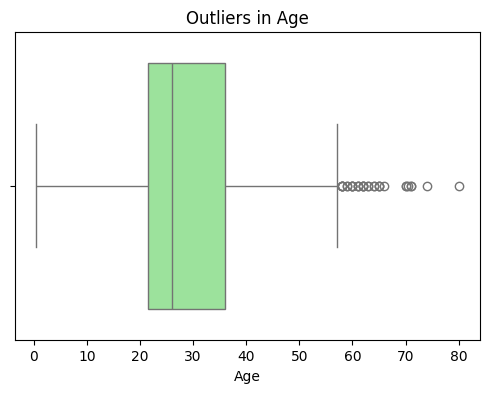

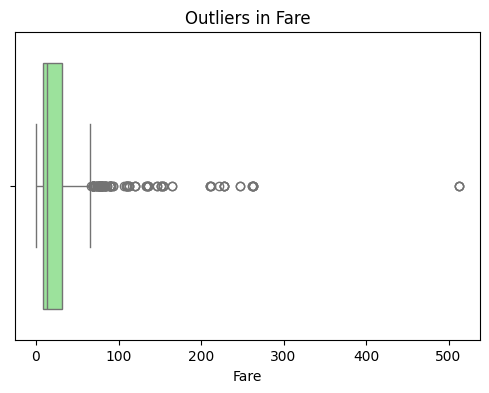

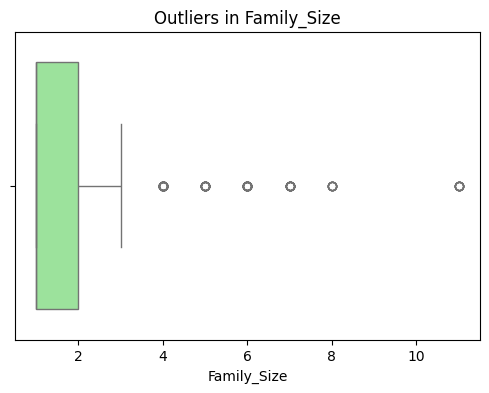

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

def boxplot_outliers(df, column_name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name].dropna(), color='lightgreen')
    plt.title(f'Outliers in {column_name}')
    plt.xlabel(column_name)
    plt.show()

for column in ['Age', 'Fare', 'Family_Size']:
    if column in titanic_df.columns:
        boxplot_outliers(titanic_df, column)

In [304]:
def categorical_vs_numerical_boxplot(df, categorical_col, numerical_col):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=categorical_col, y=numerical_col, palette='Set2')
    plt.title(f'{numerical_col} by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-2045105196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=categorical_col, y=numerical_col, palette='Set2')


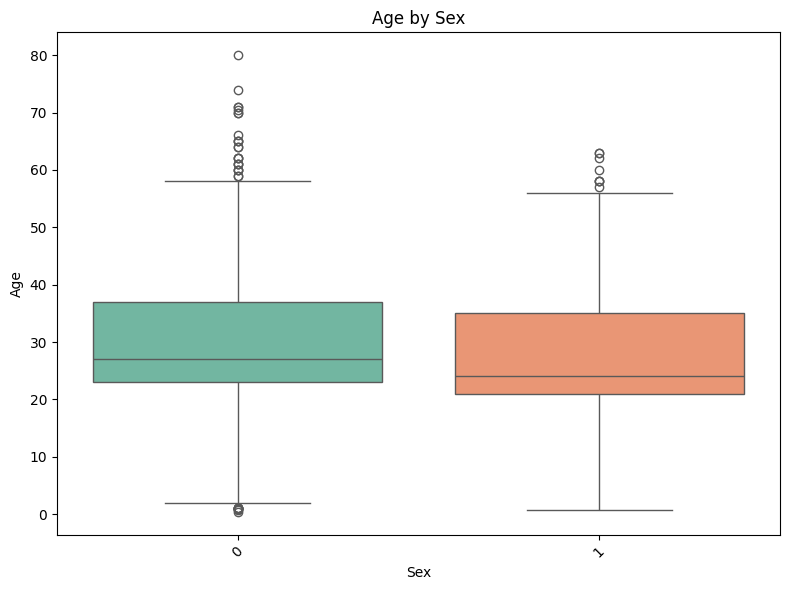

/tmp/ipython-input-2045105196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=categorical_col, y=numerical_col, palette='Set2')


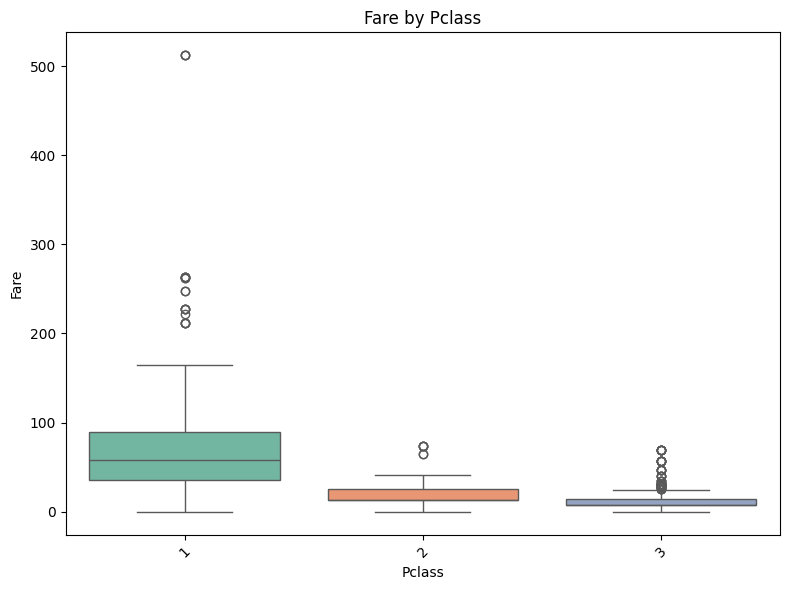

/tmp/ipython-input-2045105196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=categorical_col, y=numerical_col, palette='Set2')


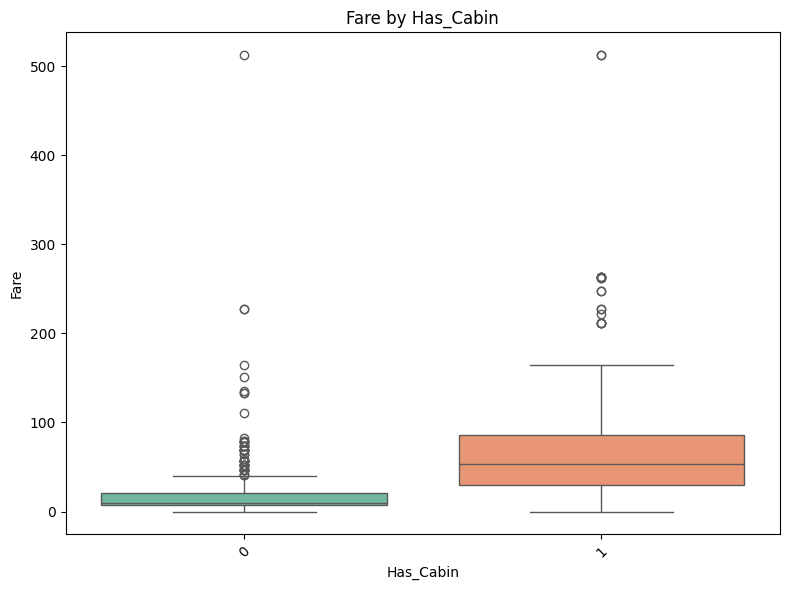

/tmp/ipython-input-2045105196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=categorical_col, y=numerical_col, palette='Set2')


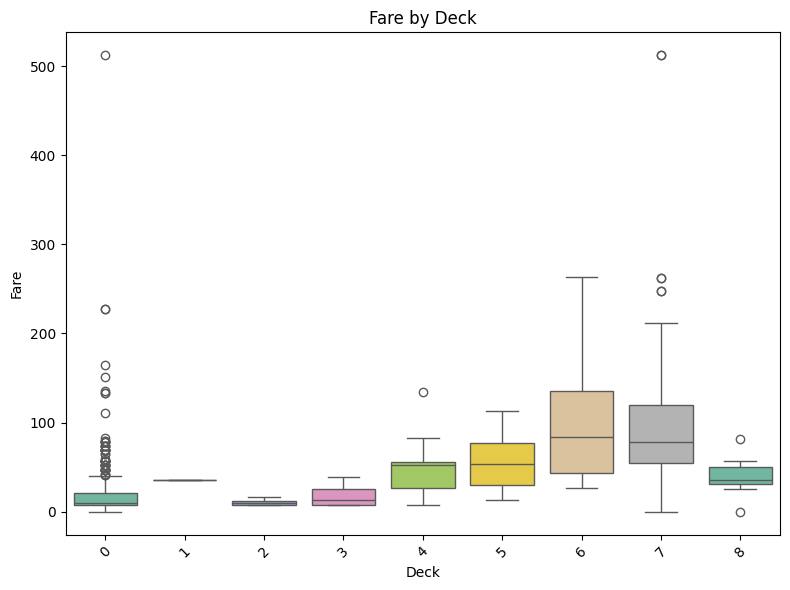

/tmp/ipython-input-2045105196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=categorical_col, y=numerical_col, palette='Set2')


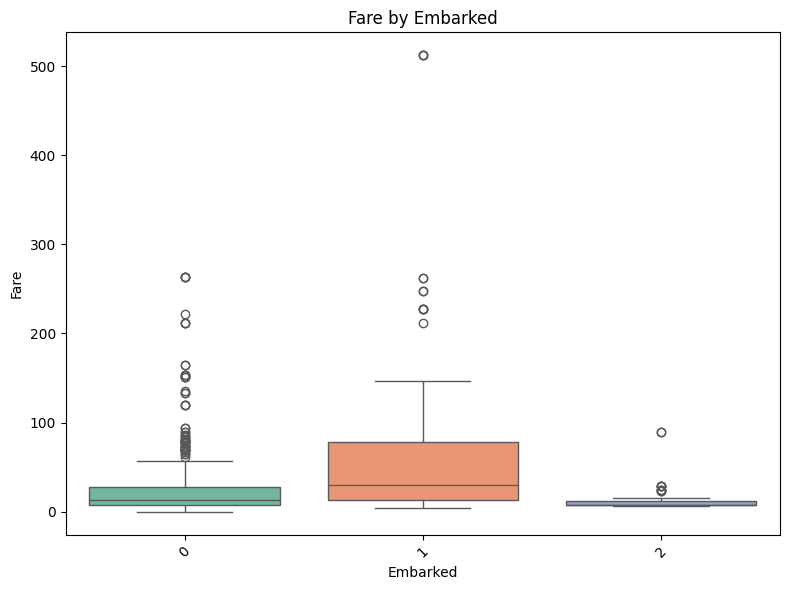

In [305]:
categorical_vs_numerical_boxplot(titanic_df, 'Sex', 'Age')
categorical_vs_numerical_boxplot(titanic_df, 'Pclass', 'Fare')
categorical_vs_numerical_boxplot(titanic_df, 'Has_Cabin', 'Fare')
categorical_vs_numerical_boxplot(titanic_df, 'Deck', 'Fare')
categorical_vs_numerical_boxplot(titanic_df, 'Embarked', 'Fare')

Z zobaczonych dziwnych rzeczy to mała cena za bilet na pokładzie na poziomie A, choćby wydaje się że czym wyższy pokład tym droższy powinien być bilet. Wydaje się że kilku ludzi z zagubionych kabin byli z pierwszego i drugiego klasu.